# **Introducción a la Optimización de Portafolios**

Autor: Sergio Diaz Paredes

Contacto: [Linkedin](https://www.linkedin.com/in/sergio-diaz-paredes/)

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importando una serie

Al obtener series financieras de Yahoo Finance, generalmente accedemos a un DataFrame que incluye varias columnas clave:

- **`Open`**: Precio de apertura del activo al inicio de la sesión de trading.
- **`High`**: Precio máximo alcanzado durante el período.
- **`Low`**: Precio mínimo alcanzado durante el período.
- **`Close`**: Precio de cierre del activo al final de la sesión de trading.
- **`Adj Close`**: Precio de cierre ajustado, que tiene en cuenta dividendos y divisiones de acciones.
- **`Volume`**: Número de acciones o contratos negociados durante el período.

Para la optimización de portafolios, la columna más relevante es **`Adj Close`**. Este precio ajustado proporciona una representación precisa del valor de un activo después de ajustes corporativos y es crucial para calcular rendimientos históricos y riesgos, que son fundamentales en el análisis y optimización de carteras.

In [2]:
start = '2024-01-01'

In [3]:
AAPL = yf.download('AAPL', start=start)
AAPL.columns = AAPL.columns.droplevel(1)
AAPL

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-01-02,184.734985,185.639999,188.440002,183.889999,187.149994,82488700
2024-01-03,183.351776,184.250000,185.880005,183.429993,184.220001,58414500
2024-01-04,181.023163,181.910004,183.089996,180.880005,182.149994,71983600
2024-01-05,180.296707,181.179993,182.759995,180.169998,181.990005,62303300
2024-01-08,184.655365,185.559998,185.600006,181.500000,182.089996,59144500
...,...,...,...,...,...,...
2024-12-20,254.490005,254.490005,255.000000,245.690002,248.039993,147495300
2024-12-23,255.270004,255.270004,255.649994,253.449997,254.770004,40858800
2024-12-24,258.200012,258.200012,258.209991,255.289993,255.490005,23234700


In [4]:
MSFT = yf.download('MSFT', start=start)
MSFT.columns = MSFT.columns.droplevel(1)
MSFT

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-01-02,368.854095,370.869995,375.899994,366.769989,373.859985,25258600
2024-01-03,368.585571,370.600006,373.260010,368.510010,369.010010,23083500
2024-01-04,365.940002,367.940002,373.100006,367.170013,370.670013,20901500
2024-01-05,365.751068,367.750000,372.059998,366.500000,368.970001,20987000
2024-01-08,372.653351,374.690002,375.200012,369.010010,369.299988,23134000
...,...,...,...,...,...,...
2024-12-20,436.600006,436.600006,443.739990,428.630005,433.109985,64263700
2024-12-23,435.250000,435.250000,437.649994,432.829987,436.739990,19152500
2024-12-24,439.329987,439.329987,439.600006,434.190002,434.649994,7164500


## Importando multiples series

In [5]:
tech_stocks = ['AAPL', 'MSFT', 'GOOGL']
portafolio_tech = yf.download(tech_stocks, start=start)
portafolio_tech

[*********************100%***********************]  3 of 3 completed


Price        Adj Close                               Close              \
Ticker            AAPL       GOOGL        MSFT        AAPL       GOOGL   
Date                                                                     
2024-01-02  184.734970  137.670929  368.854095  185.639999  138.169998   
2024-01-03  183.351761  138.418213  368.585571  184.250000  138.919998   
2024-01-04  181.023163  135.897354  365.940002  181.910004  136.389999   
2024-01-05  180.296722  135.239746  365.751068  181.179993  135.729996   
2024-01-08  184.655365  138.338501  372.653351  185.559998  138.839996   
...                ...         ...         ...         ...         ...   
2024-12-20  254.490005  191.410004  436.600006  254.490005  191.410004   
2024-12-23  255.270004  194.630005  435.250000  255.270004  194.630005   
2024-12-24  258.200012  196.110001  439.329987  258.200012  196.110001   
2024-12-26  259.019989  195.600006  438.109985  259.019989  195.600006   
2024-12-27  255.589996  192.759995  430.529999  255.589996  192.759995   

Price                         High                                 Low  \
Ticker            MSFT        AAPL       GOOGL        MSFT        AAPL   
Date                                                                     
2024-01-02  370.869995  188.440002  139.449997  375.899994  183.889999   
2024-01-03  370.600006  185.880005  139.630005  373.260010  183.429993   
2024-01-04  367.940002  183.089996  139.160004  373.100006  180.880005   
2024-01-05  367.750000  182.759995  137.160004  372.059998  180.169998   
2024-01-08  374.690002  185.600006  139.009995  375.200012  181.500000   
...                ...         ...         ...         ...         ...   
2024-12-20  436.600006  255.000000  192.889999  443.739990  245.690002   
2024-12-23  435.250000  255.649994  195.100006  437.649994  253.449997   
2024-12-24  439.329987  258.209991  196.110001  439.600006  255.289993   
2024-12-26  438.109985  260.100006  196.750000  440.940002  257.630005   
2024-12-27  430.529999  258.700012  195.320007  435.220001  253.059998   

Price                                     Open                          \
Ticker           GOOGL        MSFT        AAPL       GOOGL        MSFT   
Date                                                                     
2024-01-02  136.479996  366.769989  187.149994  138.550003  373.859985   
2024-01-03  137.080002  368.510010  184.220001  137.250000  369.010010   
2024-01-04  136.350006  367.170013  182.149994  138.419998  370.670013   
2024-01-05  135.149994  366.500000  181.990005  136.750000  368.970001   
2024-01-08  136.259995  369.010010  182.089996  136.289993  369.299988   
...                ...         ...         ...         ...         ...   
2024-12-20  185.220001  428.630005  248.039993  185.779999  433.109985   
2024-12-23  190.149994  432.829987  254.770004  192.619995  436.739990   
2024-12-24  193.779999  434.190002  255.490005  194.839996  434.649994   
2024-12-26  194.380005  436.630005  258.190002  195.149994  439.079987   
2024-12-27  190.649994  426.350006  257.829987  194.949997  434.600006   

Price          Volume                      
Ticker           AAPL     GOOGL      MSFT  
Date                                       
2024-01-02   82488700  23711200  25258600  
2024-01-03   58414500  24212100  23083500  
2024-01-04   71983600  27137700  20901500  
2024-01-05   62303300  22506000  20987000  
2024-01-08   59144500  21404000  23134000  
...               ...       ...       ...  
2024-12-20  147495300  63462900  64263700  
2024-12-23   40858800  25675000  19152500  
2024-12-24   23234700  10403300   7164500  
2024-12-26   27237100  12046600   8194200  
2024-12-27   42317100  18868900  18095100  

[250 rows x 18 columns]

In [6]:
portafolio_tech = portafolio_tech['Adj Close'].copy()
portafolio_tech

Ticker,AAPL,GOOGL,MSFT
Date,,,
2024-01-02,184.734970,137.670929,368.854095
2024-01-03,183.351761,138.418213,368.585571
2024-01-04,181.023163,135.897354,365.940002
2024-01-05,180.296722,135.239746,365.751068
2024-01-08,184.655365,138.338501,372.653351
...,...,...,...
2024-12-20,254.490005,191.410004,436.600006
2024-12-23,255.270004,194.630005,435.250000
2024-12-24,258.200012,196.110001,439.329987


## Visualizando datos

<Axes: xlabel='Date'>

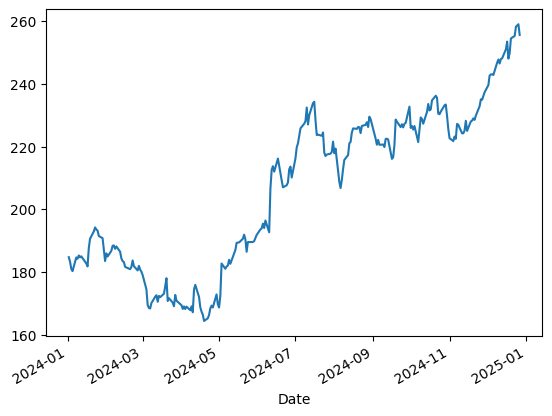

In [7]:
AAPL['Adj Close'].plot()

# Fundamentos de Retornos

## 1. Tasa de Retorno

La **tasa de retorno** mide la ganancia o pérdida de una inversión durante un período de tiempo, expresada como un porcentaje del valor inicial de la inversión.

### 1.1. Tasa de Retorno Simple

La tasa de retorno simple para un activo $ i $ durante un período se calcula como:

$$
R_i = \frac{P_{i,t} - P_{i,t-1}}{P_{i,t-1}}
$$

Donde:
- $ P_{i,t} $ es el precio del activo $ i $ en el tiempo $ t $.
- $ P_{i,t-1} $ es el precio del activo $ i $ en el tiempo $ t-1 $.

In [8]:
AAPL

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-01-02,184.734985,185.639999,188.440002,183.889999,187.149994,82488700
2024-01-03,183.351776,184.250000,185.880005,183.429993,184.220001,58414500
2024-01-04,181.023163,181.910004,183.089996,180.880005,182.149994,71983600
2024-01-05,180.296707,181.179993,182.759995,180.169998,181.990005,62303300
2024-01-08,184.655365,185.559998,185.600006,181.500000,182.089996,59144500
...,...,...,...,...,...,...
2024-12-20,254.490005,254.490005,255.000000,245.690002,248.039993,147495300
2024-12-23,255.270004,255.270004,255.649994,253.449997,254.770004,40858800
2024-12-24,258.200012,258.200012,258.209991,255.289993,255.490005,23234700


In [9]:
AAPL['Adj Close'].pct_change()

,Adj Close
Date,
2024-01-02,NaN
2024-01-03,-0.007488
2024-01-04,-0.012700
2024-01-05,-0.004013
2024-01-08,0.024175
...,...
2024-12-20,0.018816
2024-12-23,0.003065
2024-12-24,0.011478


<Axes: xlabel='Date'>

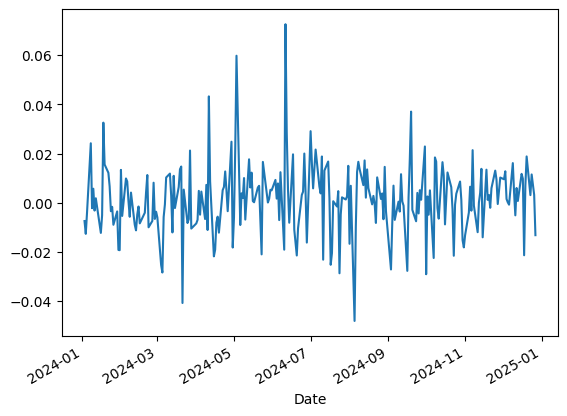

In [10]:
AAPL['Adj Close'].pct_change().plot()

### 1.2. Tasa de Retorno Logarítmica

En análisis financiero, a veces se utiliza la **tasa de retorno logarítmica**, especialmente para análisis en series temporales y modelado econométrico:

$$
R_i^{\text{log}} = \ln\left(\frac{P_{i,t}}{P_{i,t-1}}\right)
$$

Esta forma de calcular el retorno tiene la propiedad de ser aditiva en el tiempo, lo que facilita algunos tipos de análisis.

In [11]:
AAPL['log_A_Close'] = np.log(AAPL['Adj Close'])

In [12]:
AAPL['log_A_Close'].diff()

,log_A_Close
Date,
2024-01-02,NaN
2024-01-03,-0.007516
2024-01-04,-0.012782
2024-01-05,-0.004021
2024-01-08,0.023887
...,...
2024-12-20,0.018641
2024-12-23,0.003060
2024-12-24,0.011413


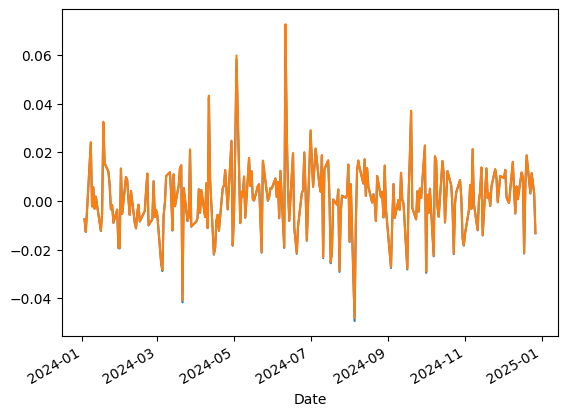

In [13]:
fig,ax = plt.subplots()
AAPL['log_A_Close'].diff().plot(ax=ax)
AAPL['Adj Close'].pct_change().plot(ax=ax)
plt.show()

## 2. Matriz de Rendimientos

La **matriz de rendimientos** es una representación tabular que recoge los retornos de varios activos a lo largo del tiempo. Si tienes $ n $ activos y observas sus retornos durante $ T $ períodos, la matriz de rendimientos $ \mathbf{R} $ se estructura de la siguiente manera:

$$
\mathbf{R} = \begin{pmatrix}
R_{1,1} & R_{1,2} & \dots & R_{1,T} \\
R_{2,1} & R_{2,2} & \dots & R_{2,T} \\
\vdots & \vdots & \ddots & \vdots \\
R_{n,1} & R_{n,2} & \dots & R_{n,T}
\end{pmatrix}
$$

Donde:
- $ R_{i,t} $ es el retorno del activo $ i $ en el período $ t $.

Esta matriz es fundamental para calcular el rendimiento esperado y la varianza-covarianza de un portafolio.

In [14]:
portafolio_tech.pct_change().T

Date,2024-01-02,2024-01-03,2024-01-04,2024-01-05,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12,2024-01-16,...,2024-12-13,2024-12-16,2024-12-17,2024-12-18,2024-12-19,2024-12-20,2024-12-23,2024-12-24,2024-12-26,2024-12-27
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,NaN,-0.007488,-0.012700,-0.004013,0.024175,-0.002263,0.005671,-0.003222,0.001778,-0.012317,...,0.000686,0.011728,0.009720,-0.021422,0.007015,0.018816,0.003065,0.011478,0.003176,-0.013242
GOOGL,NaN,0.005428,-0.018212,-0.004839,0.022913,0.015198,0.009436,-0.001406,0.004012,-0.001122,...,-0.011148,0.036034,-0.006305,-0.035923,0.000584,0.015384,0.016823,0.007604,-0.002601,-0.014519
MSFT,NaN,-0.000728,-0.007178,-0.000516,0.018872,0.002936,0.018574,0.004859,0.009984,0.004634,...,-0.005094,0.009659,0.006355,-0.037561,-0.000823,-0.000984,-0.003092,0.009374,-0.002777,-0.017302


### 3. Rendimiento Esperado de un Activo

El **rendimiento esperado** de un activo es la media de sus retornos a lo largo del tiempo. Para un activo $ i $, el rendimiento esperado $ \mu_i $ se calcula como:

$$
\mu_i = \frac{1}{T} \sum_{t=1}^{T} R_{i,t}
$$

Este valor representa el rendimiento promedio que un inversor podría esperar en el futuro, basado en los retornos históricos.

<Axes: xlabel='Date'>

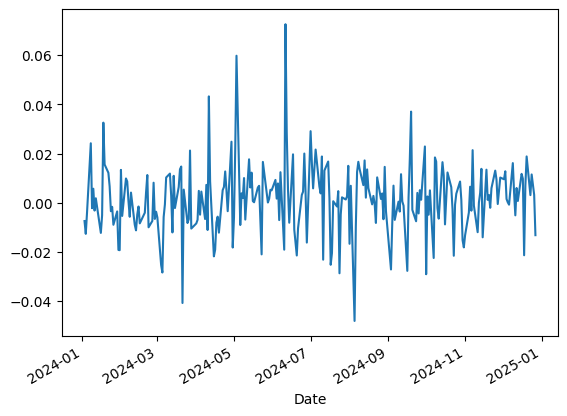

In [15]:
AAPL['Adj Close'].pct_change().plot()

In [16]:
# Calcular el rendimiento esperado
rendimiento_esperado = AAPL['Adj Close'].pct_change().mean()

print(f'Rendimiento Esperado de Apple: {rendimiento_esperado*100:.2f}(%)')
rendimiento_anualizado = (1 + rendimiento_esperado) ** 252 - 1
print(f'Rendimiento Anualizado de Apple: {rendimiento_anualizado*100:.2f}(%)')

Rendimiento Esperado de Apple: 0.14(%)
Rendimiento Anualizado de Apple: 42.40(%)


In [17]:
R_AAPL = yf.download('AAPL', start='2004-01-01')
R_AAPL.columns = R_AAPL.columns.droplevel(1)

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

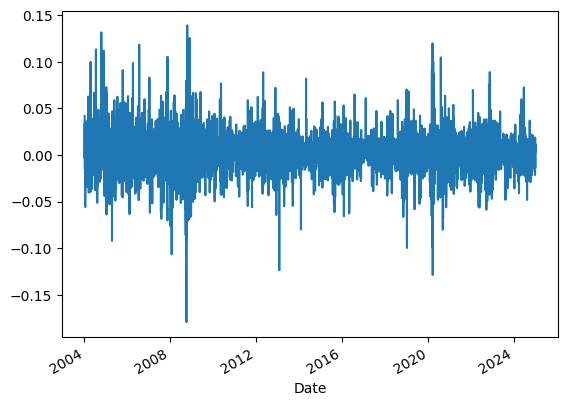

In [18]:
R_AAPL['Adj Close'].pct_change().plot()

In [19]:
R_AAPL

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2004-01-02,0.320548,0.380000,0.388393,0.378214,0.384821,144642400
2004-01-05,0.333954,0.395893,0.399821,0.382500,0.382500,395018400
2004-01-06,0.332749,0.394464,0.400357,0.387679,0.397321,509348000
2004-01-07,0.340281,0.403393,0.407679,0.391607,0.394643,586874400
2004-01-08,0.351880,0.417143,0.423750,0.404464,0.407857,460303200
...,...,...,...,...,...,...
2024-12-20,254.490005,254.490005,255.000000,245.690002,248.039993,147495300
2024-12-23,255.270004,255.270004,255.649994,253.449997,254.770004,40858800
2024-12-24,258.200012,258.200012,258.209991,255.289993,255.490005,23234700


In [20]:
l_hor, l_rend, l_rend_y = [], [], []
#R_AAPL['Adj Close'][-300:].plot()
for i in range(500,4500,500):
  rendimiento_esperado = R_AAPL[-i:]['Adj Close'].pct_change().mean()
  l_hor.append(i)
  l_rend.append(rendimiento_esperado)
  print(f"En los ultimos\t{i}\tdias:\t{rendimiento_esperado*100:.2f}(%)")
  rendimiento_anualizado = (1 + rendimiento_esperado) ** 252 - 1
  l_rend_y.append(rendimiento_anualizado)
  print(f'Rendimiento Anualizado de Apple: {rendimiento_anualizado*100:.2f}(%)')

En los ultimos	500	dias:	0.15(%)
Rendimiento Anualizado de Apple: 47.53(%)
En los ultimos	1000	dias:	0.08(%)
Rendimiento Anualizado de Apple: 23.30(%)
En los ultimos	1500	dias:	0.15(%)
Rendimiento Anualizado de Apple: 45.79(%)
En los ultimos	2000	dias:	0.13(%)
Rendimiento Anualizado de Apple: 38.08(%)
En los ultimos	2500	dias:	0.11(%)
Rendimiento Anualizado de Apple: 31.55(%)
En los ultimos	3000	dias:	0.11(%)
Rendimiento Anualizado de Apple: 32.68(%)
En los ultimos	3500	dias:	0.11(%)
Rendimiento Anualizado de Apple: 30.96(%)
En los ultimos	4000	dias:	0.13(%)
Rendimiento Anualizado de Apple: 37.64(%)


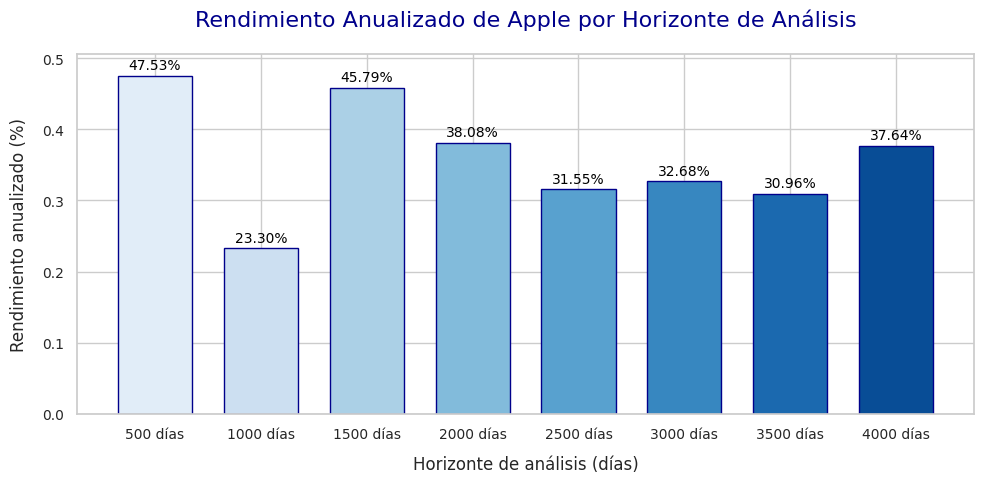

In [21]:
# Estilo y colores mejorados
sns.set_theme(style="whitegrid")  # Fondo con cuadrícula sutil
color_barras = sns.color_palette("Blues", len(l_hor))  # Gradiente de colores

# Crear gráfico de barras
plt.figure(figsize=(10, 5))
bars = plt.bar(l_hor, l_rend_y, width=350, color=color_barras, edgecolor='darkblue')

# Añadir etiquetas de valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, f"{yval*100:.2f}%",
             ha='center', va='bottom', fontsize=10, color='black')

# Configurar límites en el eje y
plt.ylim(0, max(l_rend_y) + 0.03)  # Ajusta el límite superior del eje y para espacio visual

# Etiquetas y título
plt.xlabel("Horizonte de análisis (días)", fontsize=12, labelpad=10)
plt.ylabel("Rendimiento anualizado (%)", fontsize=12, labelpad=10)
plt.title("Rendimiento Anualizado de Apple por Horizonte de Análisis", fontsize=16, pad=20, color='darkblue')

# Ajustar formato del eje x
plt.xticks(l_hor, labels=[f"{x} días" for x in l_hor], fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### 4. Varianza y Covarianza

La **varianza** de un activo $ i $ mide la dispersión de sus retornos respecto a su media (rendimiento esperado), y se calcula como:

$$
\sigma_i^2 = \frac{1}{T-1} \sum_{t=1}^{T} (R_{i,t} - \mu_i)^2
$$

La **covarianza** entre dos activos $ i $ y $ j $ mide cómo se mueven sus retornos juntos:

$$
\sigma_{ij} = \frac{1}{T-1} \sum_{t=1}^{T} (R_{i,t} - \mu_i)(R_{j,t} - \mu_j)
$$

In [22]:
# Calcular el rendimiento esperado
media = AAPL['Adj Close'].pct_change().mean()
desviacion_estandar = AAPL['Adj Close'].pct_change().std()

print(f'Volatilidad Esperado de Apple: {desviacion_estandar:.4f}')

Volatilidad Esperado de Apple: 0.0141


<Axes: xlabel='Date'>

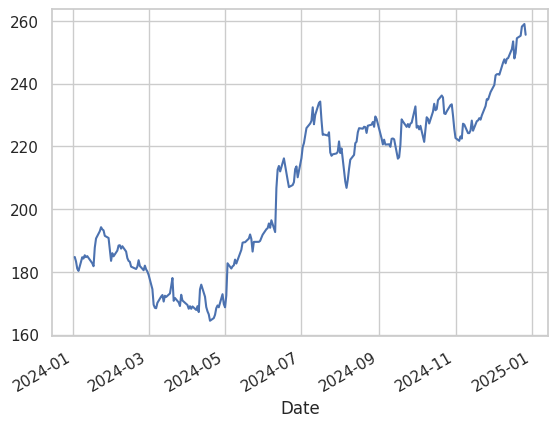

In [23]:
AAPL['Adj Close'].plot()

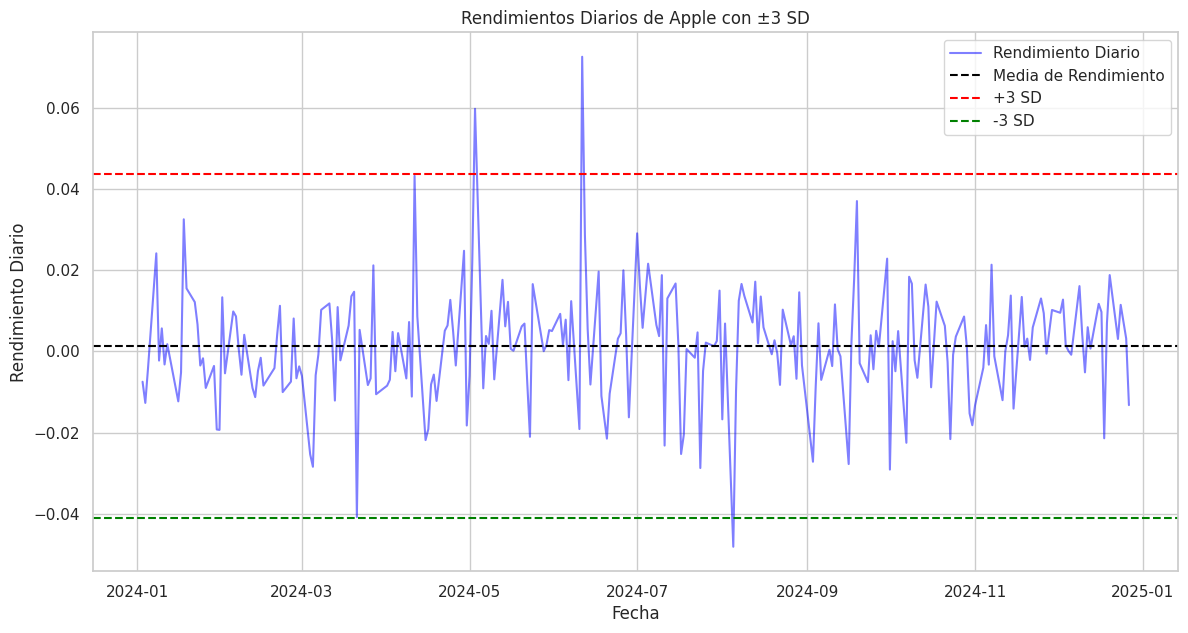

In [24]:
# Configuración de la gráfica
plt.figure(figsize=(14, 7))
plt.plot(AAPL['Adj Close'].pct_change().index, AAPL['Adj Close'].pct_change(), label='Rendimiento Diario', color='blue', alpha=0.5)

# Añadir líneas para la media y los rangos de ±3 desviaciones estándar
plt.axhline(media, color='black', linestyle='--', label='Media de Rendimiento')
plt.axhline(media + 3 * desviacion_estandar, color='red', linestyle='--', label='+3 SD')
plt.axhline(media - 3 * desviacion_estandar, color='green', linestyle='--', label='-3 SD')

# Etiquetas y título
plt.title('Rendimientos Diarios de Apple con ±3 SD')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento Diario')
plt.legend()
plt.grid(True)

# Mostrar gráfica
plt.show()

### 5. Matriz de Covarianzas

La **matriz de covarianzas** $ \mathbf{\Sigma} $ es una extensión del concepto de covarianza a múltiples activos. Cada entrada $ \sigma_{ij} $ en la matriz representa la covarianza entre los activos $ i $ y $ j $:

$$
\mathbf{\Sigma} = \begin{pmatrix}
\sigma_{11} & \sigma_{12} & \dots & \sigma_{1n} \\
\sigma_{21} & \sigma_{22} & \dots & \sigma_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{n1} & \sigma_{n2} & \dots & \sigma_{nn}
\end{pmatrix}
$$

In [25]:
portafolio_tech.pct_change().cov()

Ticker,AAPL,GOOGL,MSFT
Ticker,,,
AAPL,0.000200,0.000090,0.000083
GOOGL,0.000090,0.000314,0.000128
MSFT,0.000083,0.000128,0.000158


### 6. Rendimiento de un Portafolio

Con estos conceptos, el **rendimiento esperado de un portafolio** $ \mu_p $ se calcula como la suma ponderada de los rendimientos esperados de los activos en el portafolio:

$$
\mu_p = \sum_{i=1}^{n} w_i \mu_i
$$

Donde:
- $ w_i $ es la proporción de la inversión en el activo $ i $.
- $ \mu_i $ es el rendimiento esperado del activo $ i $.

In [26]:
pesos = np.array([0.33, 0.33, 0.34])

In [27]:
portafolio_tech.pct_change().mean()

,0
Ticker,
AAPL,0.001404
GOOGL,0.001509
MSFT,0.000701


In [28]:
np.dot(portafolio_tech.pct_change().mean(), pesos)

0.0011992960473787442

In [29]:
np.dot(portafolio_tech.pct_change(), pesos)

array([        nan, -0.00092715, -0.01264137, -0.00309669,  0.02195532,
        0.00526638,  0.01130063,  0.00012491,  0.00530504, -0.00285935,
       -0.00476643,  0.01927803,  0.01593934,  0.00129255,  0.00661839,
        0.00569535,  0.00842608, -0.00306826,  0.0065525 , -0.01169571,
       -0.04030083,  0.01220131,  0.00733313,  0.0016571 ,  0.00367908,
        0.01066697, -0.00101087,  0.01362705, -0.01050311, -0.01638637,
        0.00351795, -0.01012044, -0.01007341, -0.00101719,  0.00421044,
        0.01528138, -0.00469094, -0.0194267 ,  0.00577002, -0.00792648,
        0.00875101, -0.00360726, -0.01797028, -0.0211228 , -0.00557165,
        0.01321127,  0.00348091,  0.00798924,  0.01195028, -0.00107416,
        0.019709  , -0.01218893,  0.01803109,  0.00636289,  0.01177405,
       -0.01270203,  0.00834091, -0.00893424, -0.00185546,  0.00726076,
       -0.00392607,  0.01029116, -0.00678993,  0.00155314, -0.01304398,
        0.01202041,  0.00214319,  0.00747277, -0.00705409,  0.02

# Optimización de Carteras

### Introducción a la Teoría de Portafolio

La teoría de portafolio de Markowitz se basa en la idea de que los inversores pueden construir carteras óptimas que maximizan el rendimiento esperado para un nivel dado de riesgo, o minimizan el riesgo para un nivel dado de rendimiento esperado.

### Retorno Esperado de un Portafolio

El **retorno esperado** de un portafolio es la media ponderada de los retornos esperados de los activos individuales en el portafolio.

Si $ w_i $ representa la ponderación del activo $ i $ en el portafolio, y $ \mu_i $ es el retorno esperado del activo $ i $, entonces el retorno esperado del portafolio $ \mu_p $ se calcula como:

$$
\mu_p = \sum_{i=1}^{n} w_i \mu_i
$$

Donde:
- $ n $ es el número de activos en el portafolio.

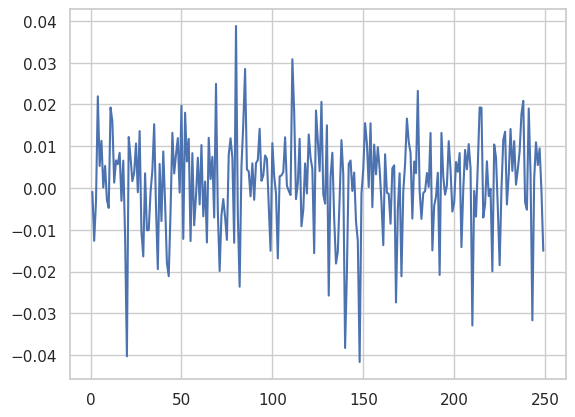

In [30]:
plt.plot(np.dot(portafolio_tech.pct_change(), pesos))

In [31]:
np.var(np.dot(portafolio_tech.pct_change(), pesos)[1:])

0.00014056818017667172

In [32]:
np.mean(np.dot(portafolio_tech.pct_change(), pesos)[1:])

0.001199296047378744

### Riesgo (Varianza) de un Portafolio

El **riesgo** de un portafolio (medido por la varianza de los retornos) no es simplemente la media ponderada de las varianzas individuales debido a la diversificación. El riesgo del portafolio tiene en cuenta las covarianzas entre los activos.

La **varianza** del portafolio $ \sigma_p^2 $ se define como:

$$
\sigma_p^2 = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \sigma_{ij}
$$

Donde:
- $ \sigma_{ij} $ es la covarianza entre los retornos de los activos $ i $ y $ j $.

En forma matricial, la varianza del portafolio puede expresarse como:

$$
\sigma_p^2 = \mathbf{w}^T \mathbf{\Sigma} \mathbf{w}
$$

Donde:
- $ \mathbf{w} $ es el vector de ponderaciones del portafolio.
- $ \mathbf{\Sigma} $ es la matriz de covarianzas entre los activos.

In [33]:
ponderaciones = np.array(pesos)

In [34]:
matriz_covarianzas = portafolio_tech.pct_change().cov()
matriz_covarianzas

Ticker,AAPL,GOOGL,MSFT
Ticker,,,
AAPL,0.000200,0.000090,0.000083
GOOGL,0.000090,0.000314,0.000128
MSFT,0.000083,0.000128,0.000158


In [35]:
# Calcular la varianza del portafolio
varianza_portafolio = np.dot(ponderaciones.T, np.dot(matriz_covarianzas, ponderaciones))

print(f'Varianza del Portafolio: {varianza_portafolio:.6f}')

Varianza del Portafolio: 0.000141


In [36]:
portafolio_tech.pct_change().corr()

Ticker,AAPL,GOOGL,MSFT
Ticker,,,
AAPL,1.000000,0.357530,0.467198
GOOGL,0.357530,1.000000,0.572467
MSFT,0.467198,0.572467,1.000000


In [37]:
portafolio_tech2 = yf.download(tech_stocks, start='2004-01-01')['Adj Close']

[*********************100%***********************]  3 of 3 completed


<Axes: xlabel='Date'>

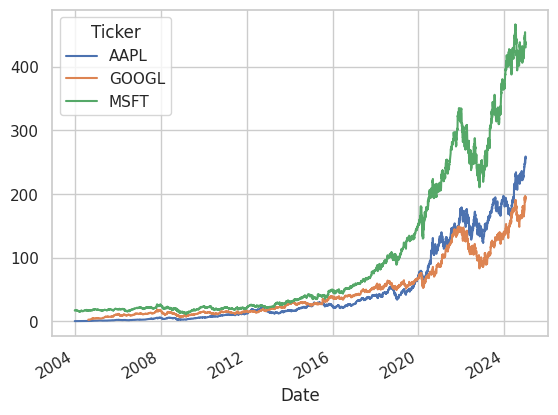

In [38]:
portafolio_tech2.plot()

<Figure size 1000x600 with 0 Axes>

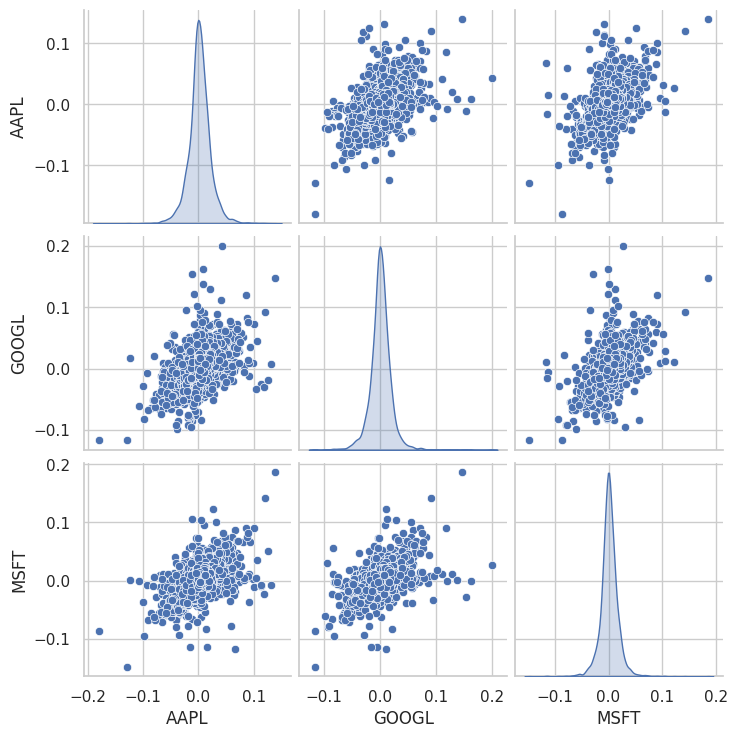

In [39]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.pairplot(portafolio_tech2.pct_change(), diag_kind='kde', markers='o')

<Figure size 1000x600 with 0 Axes>

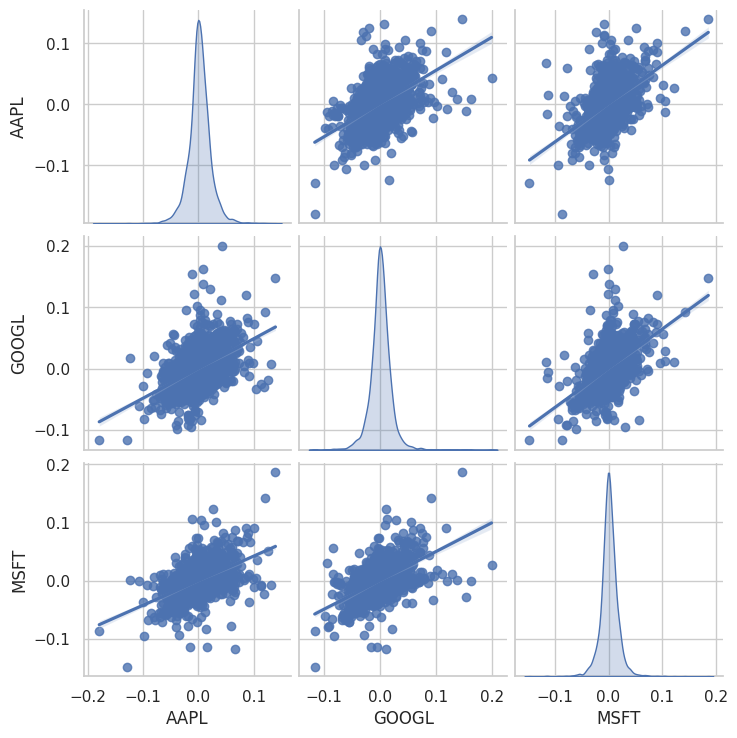

In [40]:
plt.figure(figsize=(10, 6))
sns.pairplot(portafolio_tech2.pct_change(), diag_kind='kde', markers='o', kind='reg')
plt.show()

<Figure size 1000x600 with 0 Axes>

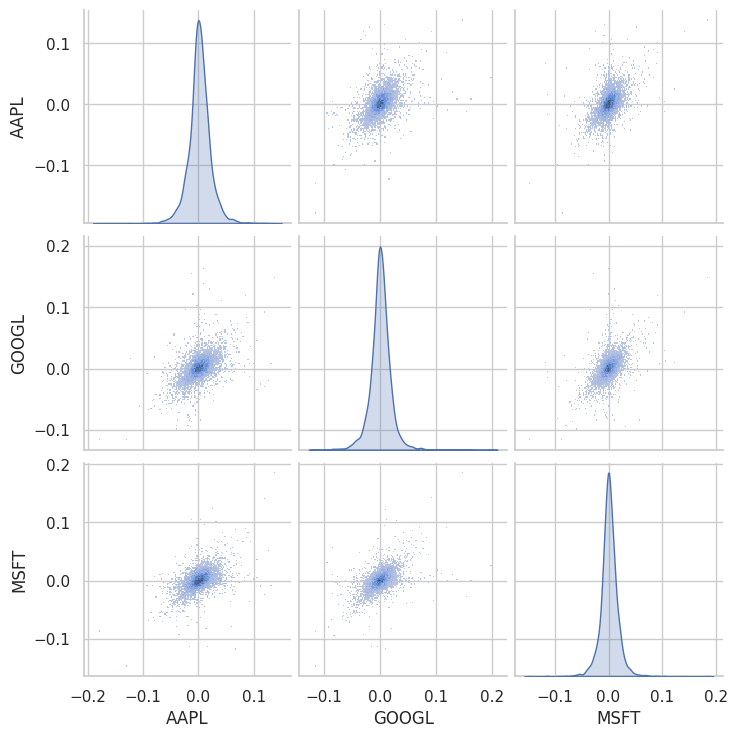

In [41]:
plt.figure(figsize=(10, 6))
sns.pairplot(portafolio_tech2.pct_change(), diag_kind='kde', markers='o', kind='hist')
plt.show()

### Optimización de Portafolio

El objetivo de la optimización del portafolio es minimizar el riesgo para un retorno esperado dado, o maximizar el retorno esperado para un nivel de riesgo dado.

In [42]:
#portafolio_tech

In [43]:
def calcular_rendimiento_riesgo(dataframe, pesos):
    retornos = dataframe.pct_change().dropna()
    rendimiento_esperado = np.dot(retornos.mean(), pesos)
    retornos_ponderados = np.dot(retornos, pesos)
    riesgo = np.std(retornos_ponderados)

    return rendimiento_esperado, riesgo

In [44]:
rendimientos, riesgos, w = [], [], []
for i in np.arange(0,1.01,0.01):
  weight = np.array([i,1-i])
  rend, risk = calcular_rendimiento_riesgo(portafolio_tech[['AAPL','GOOGL']], weight)
  rendimientos.append(rend)
  riesgos.append(risk)
  w.append(i)
rendimientos = np.array(rendimientos)
riesgos = np.array(riesgos)
w = np.array(w)

In [45]:
portafolio_tech[['AAPL','GOOGL']].pct_change().mean()

,0
Ticker,
AAPL,0.001404
GOOGL,0.001509


In [46]:
rendimientos

array([0.00150879, 0.00150774, 0.00150669, 0.00150564, 0.00150459,
       0.00150354, 0.00150249, 0.00150144, 0.00150038, 0.00149933,
       0.00149828, 0.00149723, 0.00149618, 0.00149513, 0.00149408,
       0.00149303, 0.00149198, 0.00149093, 0.00148987, 0.00148882,
       0.00148777, 0.00148672, 0.00148567, 0.00148462, 0.00148357,
       0.00148252, 0.00148147, 0.00148042, 0.00147937, 0.00147831,
       0.00147726, 0.00147621, 0.00147516, 0.00147411, 0.00147306,
       0.00147201, 0.00147096, 0.00146991, 0.00146886, 0.00146781,
       0.00146675, 0.0014657 , 0.00146465, 0.0014636 , 0.00146255,
       0.0014615 , 0.00146045, 0.0014594 , 0.00145835, 0.0014573 ,
       0.00145624, 0.00145519, 0.00145414, 0.00145309, 0.00145204,
       0.00145099, 0.00144994, 0.00144889, 0.00144784, 0.00144679,
       0.00144574, 0.00144468, 0.00144363, 0.00144258, 0.00144153,
       0.00144048, 0.00143943, 0.00143838, 0.00143733, 0.00143628,
       0.00143523, 0.00143417, 0.00143312, 0.00143207, 0.00143

In [47]:
riesgos

array([0.01769757, 0.01757154, 0.01744651, 0.01732251, 0.01719955,
       0.01707766, 0.01695687, 0.01683719, 0.01671865, 0.01660127,
       0.01648508, 0.01637011, 0.01625637, 0.01614391, 0.01603273,
       0.01592288, 0.01581437, 0.01570724, 0.01560151, 0.01549721,
       0.01539438, 0.01529303, 0.01519321, 0.01509494, 0.01499825,
       0.01490317, 0.01480973, 0.01471797, 0.01462792, 0.0145396 ,
       0.01445306, 0.01436831, 0.0142854 , 0.01420435, 0.01412521,
       0.01404799, 0.01397273, 0.01389947, 0.01382823, 0.01375905,
       0.01369196, 0.01362699, 0.01356417, 0.01350352, 0.01344509,
       0.01338889, 0.01333496, 0.01328333, 0.01323401, 0.01318704,
       0.01314245, 0.01310024, 0.01306046, 0.01302312, 0.01298824,
       0.01295585, 0.01292595, 0.01289858, 0.01287374, 0.01285145,
       0.01283172, 0.01281456, 0.01279999, 0.01278801, 0.01277864,
       0.01277187, 0.01276771, 0.01276616, 0.01276723, 0.01277092,
       0.01277721, 0.01278611, 0.01279761, 0.01281171, 0.01282

#### Minimización del Riesgo

Para un retorno objetivo $ \mu_p^* $, la optimización minimiza la varianza del portafolio sujeto a:

$$
\text{Minimizar } \mathbf{w}^T \mathbf{\Sigma} \mathbf{w}
$$
$$
\text{Sujeto a: } \sum_{i=1}^{n} w_i \mu_i = \mu_p^* \quad \text{y} \quad \sum_{i=1}^{n} w_i = 1
$$

In [48]:
riesgos.argmin()

67

In [49]:
rendimientos[67]

0.0014383786671740505

#### Frontera Eficiente

La **frontera eficiente** es el conjunto de portafolios que ofrecen el mayor retorno esperado para un nivel dado de riesgo o el menor riesgo para un nivel dado de retorno.

In [50]:
cmap = plt.get_cmap('plasma')
norm = plt.Normalize(w.min(), w.max())
colors = cmap(norm(w))

In [51]:
# Encontrar el portafolio de mínima varianza
idx_min_var = np.argmin(riesgos)
min_var_riesgo = riesgos[idx_min_var]
min_var_rendimiento = rendimientos[idx_min_var]

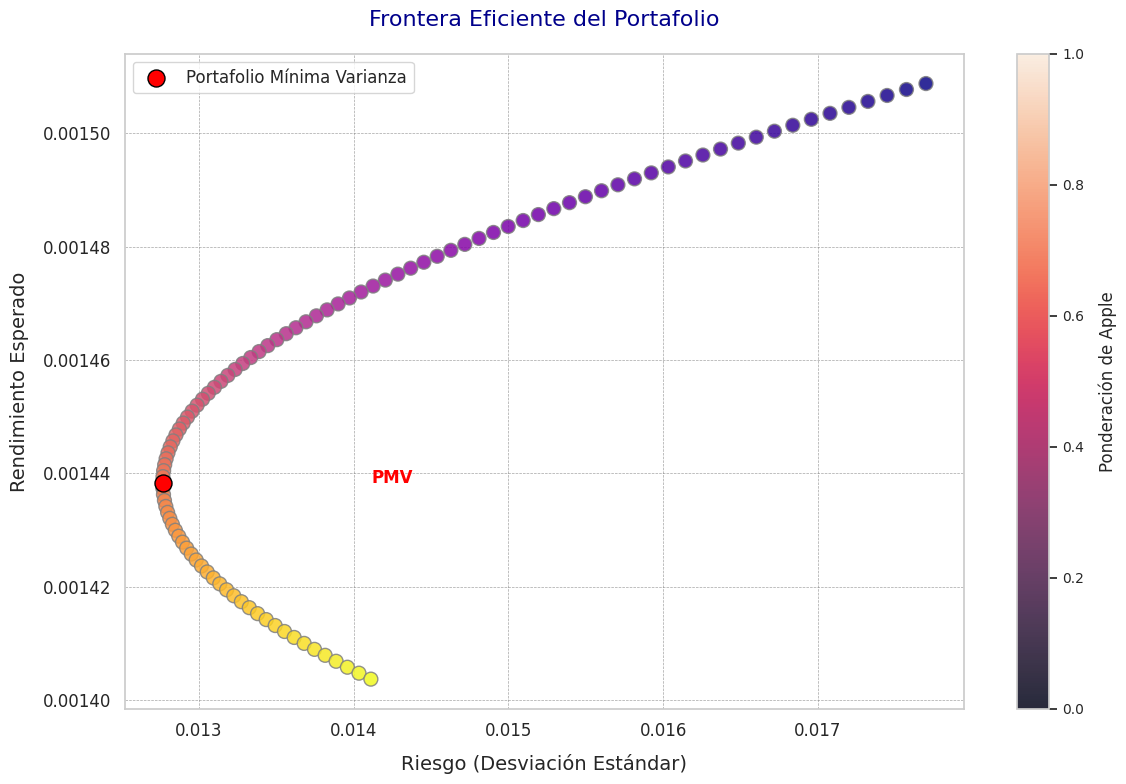

In [52]:
# Crear gráfico
plt.figure(figsize=(12, 8))
scatter = plt.scatter(riesgos, rendimientos, c=colors, edgecolor='gray', s=100, alpha=0.85)

# Marcar el portafolio de mínima varianza
plt.scatter(min_var_riesgo, min_var_rendimiento, color='red', edgecolor='black', s=150, zorder=5, label='Portafolio Mínima Varianza')
plt.text(min_var_riesgo + 0.00135, min_var_rendimiento, 'PMV', color='red', fontsize=12, fontweight='bold')

# Personalizar colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Ponderación de Apple', fontsize=12, labelpad=10)
cbar.ax.tick_params(labelsize=10)

# Títulos y etiquetas
plt.title('Frontera Eficiente del Portafolio', fontsize=16, pad=20, color='darkblue')
plt.xlabel('Riesgo (Desviación Estándar)', fontsize=14, labelpad=10)
plt.ylabel('Rendimiento Esperado', fontsize=14, labelpad=10)

# Ajuste de cuadrícula y estilo
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper left')

# Ajuste final y mostrar
plt.tight_layout()
plt.show()

### Diversificación y Reducción de Riesgo

La diversificación implica combinar activos que no están perfectamente correlacionados entre sí para reducir el riesgo total del portafolio. Si los activos tienen una correlación baja o negativa, el riesgo del portafolio puede ser menor que la suma de los riesgos individuales de los activos.

In [53]:
# Ticker de las empresas en el primer portafolio (Apple y Microsoft)
tickers_tech = ['AAPL', 'MSFT']
df_tech = yf.download(tickers_tech, start='2023-01-01', end='2024-01-01')['Adj Close']

#
tickers_diverse1 = ['MSFT', 'JNJ']
df_diverse1 = yf.download(tickers_diverse1, start='2023-01-01', end='2024-01-01')['Adj Close']

#
tickers_diverse2 = ['AAPL', 'PFE']
df_diverse2 = yf.download(tickers_diverse2, start='2023-01-01', end='2024-01-01')['Adj Close']

#
tickers_farm = ['PFE', 'JNJ']
df_farm = yf.download(tickers_farm, start='2023-01-01', end='2024-01-01')['Adj Close']

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


In [54]:
def calcular_rendimiento_riesgo(dataframe, pesos):
    retornos = dataframe.pct_change().dropna()
    rendimiento_esperado = np.dot(retornos.mean(), pesos)
    retornos_ponderados = np.dot(retornos, pesos)
    riesgo_varianza = np.var(retornos_ponderados)
    riesgo_desviacion_estandar = np.sqrt(riesgo_varianza)
    return rendimiento_esperado, riesgo_desviacion_estandar

def frontera_eficiente(dataframe, num_puntos=100):
    rendimientos = []
    riesgos = []
    pesos_range = np.arange(0, 1.01, 1/num_puntos)

    for i in pesos_range:
        weights = np.array([i, 1-i])
        rend, risk = calcular_rendimiento_riesgo(dataframe, weights)
        rendimientos.append(rend)
        riesgos.append(risk)

    return np.array(rendimientos), np.array(riesgos)

# Calcular fronteras eficientes
rendimientos_tech, riesgos_tech = frontera_eficiente(df_tech)
rendimientos_farm, riesgos_farm = frontera_eficiente(df_farm)
rendimientos_div1, riesgos_div1 = frontera_eficiente(df_diverse1)
rendimientos_div2, riesgos_div2 = frontera_eficiente(df_diverse2)

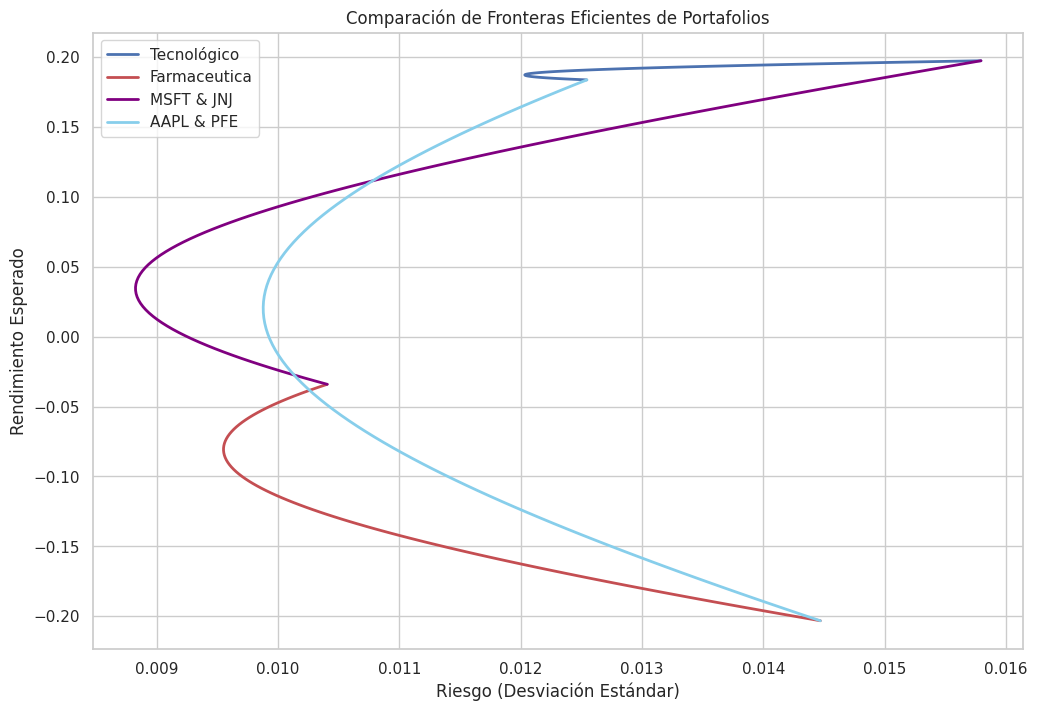

In [55]:
plt.figure(figsize=(12, 8))

# Graficar frontera eficiente para el portafolio tecnológico
plt.plot(riesgos_tech, rendimientos_tech*100, 'b', markersize=4, linewidth=2, label='Tecnológico')
plt.plot(riesgos_farm, rendimientos_farm*100, 'r', markersize=4, linewidth=2, label='Farmaceutica')
plt.plot(riesgos_div1, rendimientos_div1*100, 'purple', markersize=4, linewidth=2, label='MSFT & JNJ')
plt.plot(riesgos_div2, rendimientos_div2*100, 'skyblue', markersize=4, linewidth=2, label='AAPL & PFE')

## Etiquetas y título
plt.title('Comparación de Fronteras Eficientes de Portafolios')
plt.xlabel('Riesgo (Desviación Estándar)')
plt.ylabel('Rendimiento Esperado')
plt.legend()
plt.grid(True)

# Mostrar gráfica
plt.show()

In [56]:
all = yf.download(tickers_tech+tickers_farm, start='2023-01-01', end='2024-01-01')['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [57]:
all.pct_change().corr()

Ticker,AAPL,JNJ,MSFT,PFE
Ticker,,,,
AAPL,1.000000,0.138843,0.547988,0.087163
JNJ,0.138843,1.000000,0.034726,0.307726
MSFT,0.547988,0.034726,1.000000,0.139242
PFE,0.087163,0.307726,0.139242,1.000000


### Indicadores mensuales

In [58]:
# Ticker de las empresas en el primer portafolio (Apple y Microsoft)
df_tech_m = yf.download(tickers_tech, start='2000-01-01', end='2024-01-01', interval='1mo')['Adj Close']

#
df_diverse1_m = yf.download(tickers_diverse1, start='2000-01-01', end='2024-01-01', interval='1mo')['Adj Close']

#
df_diverse2_m = yf.download(tickers_diverse2, start='2000-01-01', end='2024-01-01', interval='1mo')['Adj Close']

#
df_farm_m = yf.download(tickers_farm, start='2000-01-01', end='2024-01-01', interval='1mo')['Adj Close']

df_port_m = yf.download(tickers_tech + tickers_farm, start='2000-01-01', end='2024-01-01', interval='1mo')['Adj Close']
df_port_m = df_port_m[tickers_tech + tickers_farm].copy()

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  4 of 4 completed


In [59]:
df_port_m.pct_change().describe().T[['mean','std']]

,mean,std
Ticker,,
AAPL,0.026046,0.112171
MSFT,0.012066,0.081098
PFE,0.004085,0.060650
JNJ,0.007822,0.047966


<ipython-input-60-c4d429cd19cd>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_port_m.pct_change().plot(subplots=True,ax=ax)


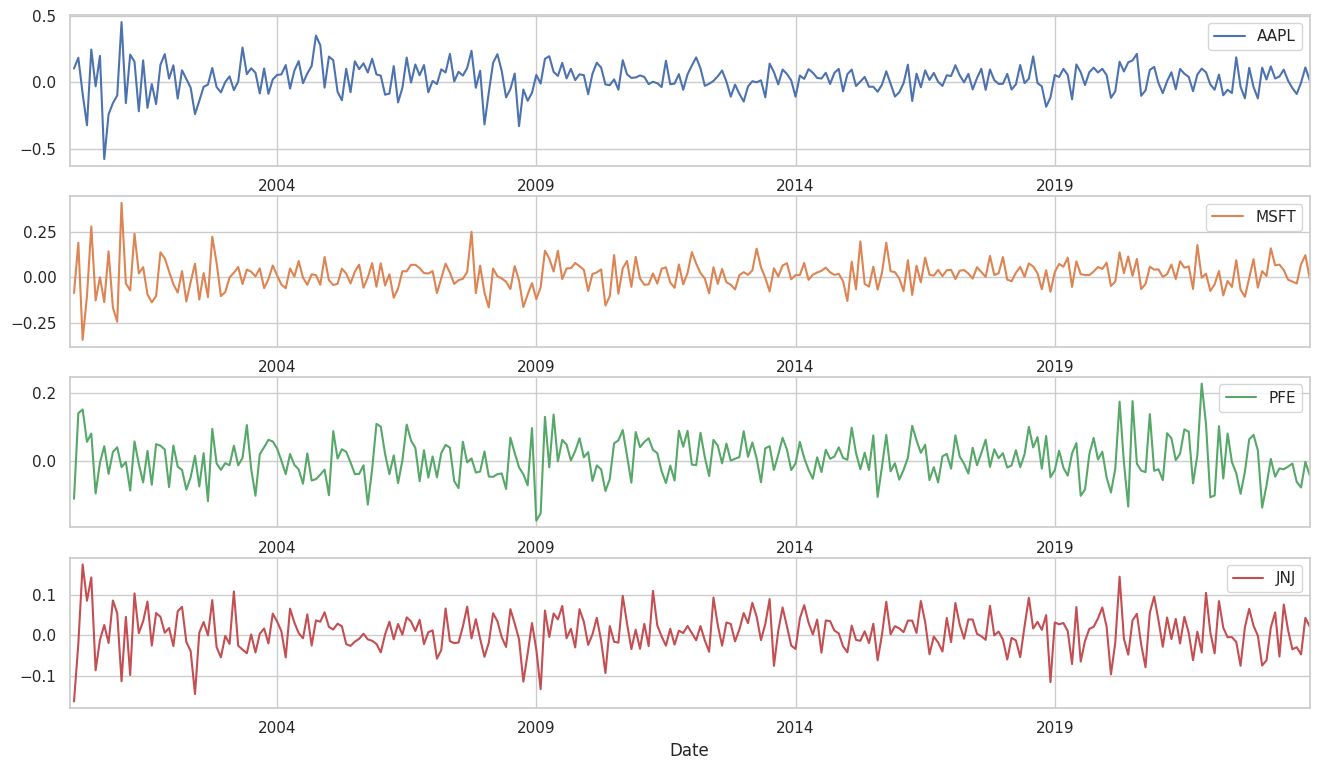

In [60]:
fig, ax = plt.subplots(figsize=(16,9))
df_port_m.pct_change().plot(subplots=True,ax=ax)
plt.show()

In [61]:
df_port_m.pct_change().corr()

Ticker,AAPL,MSFT,PFE,JNJ
Ticker,,,,
AAPL,1.000000,0.473225,0.061941,0.079443
MSFT,0.473225,1.000000,0.212056,0.173093
PFE,0.061941,0.212056,1.000000,0.499957
JNJ,0.079443,0.173093,0.499957,1.000000


<Figure size 1000x600 with 0 Axes>

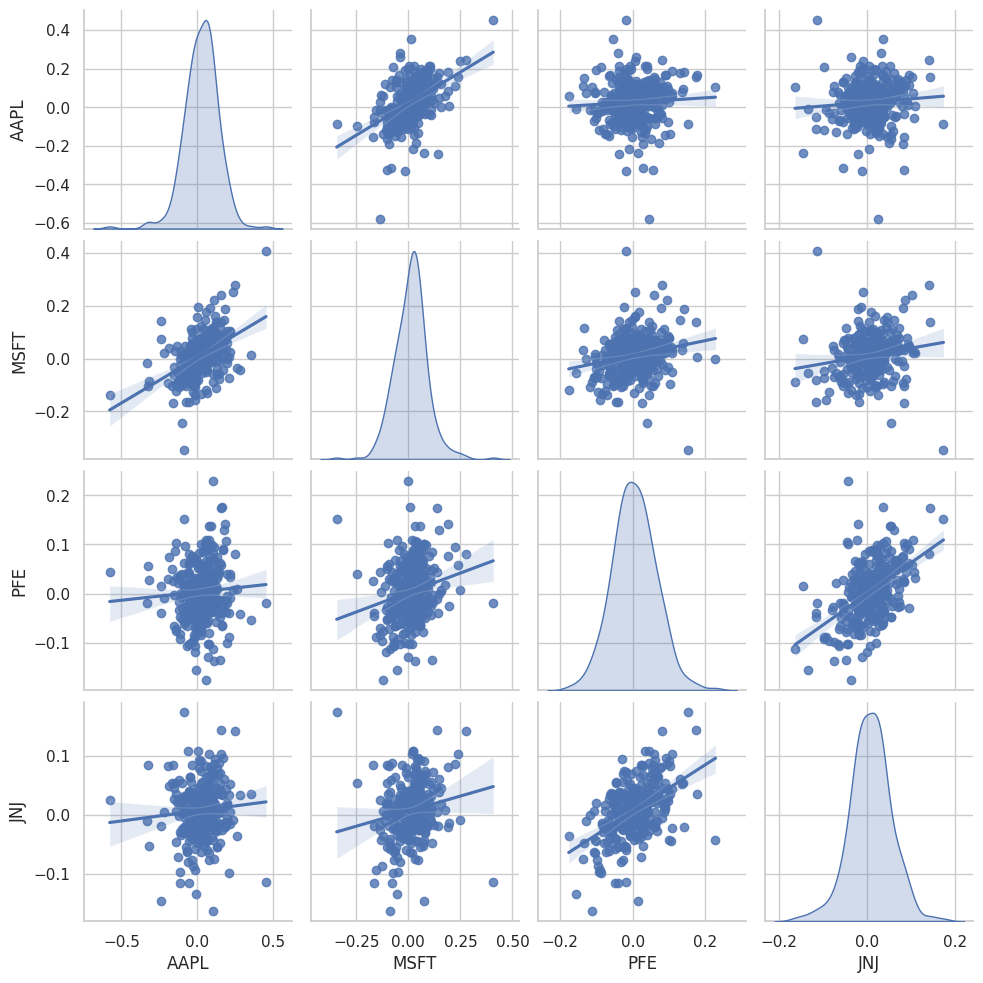

In [62]:
plt.figure(figsize=(10, 6))
sns.pairplot(df_port_m.pct_change(), diag_kind='kde', markers='o', kind='reg')
plt.show()

In [63]:
# Calcular fronteras eficientes
rendimientos_tech_m, riesgos_tech_m = frontera_eficiente(df_tech_m)
rendimientos_farm_m, riesgos_farm_m = frontera_eficiente(df_farm_m)
rendimientos_div1_m, riesgos_div1_m = frontera_eficiente(df_diverse1_m)
rendimientos_div2_m, riesgos_div2_m = frontera_eficiente(df_diverse2_m)

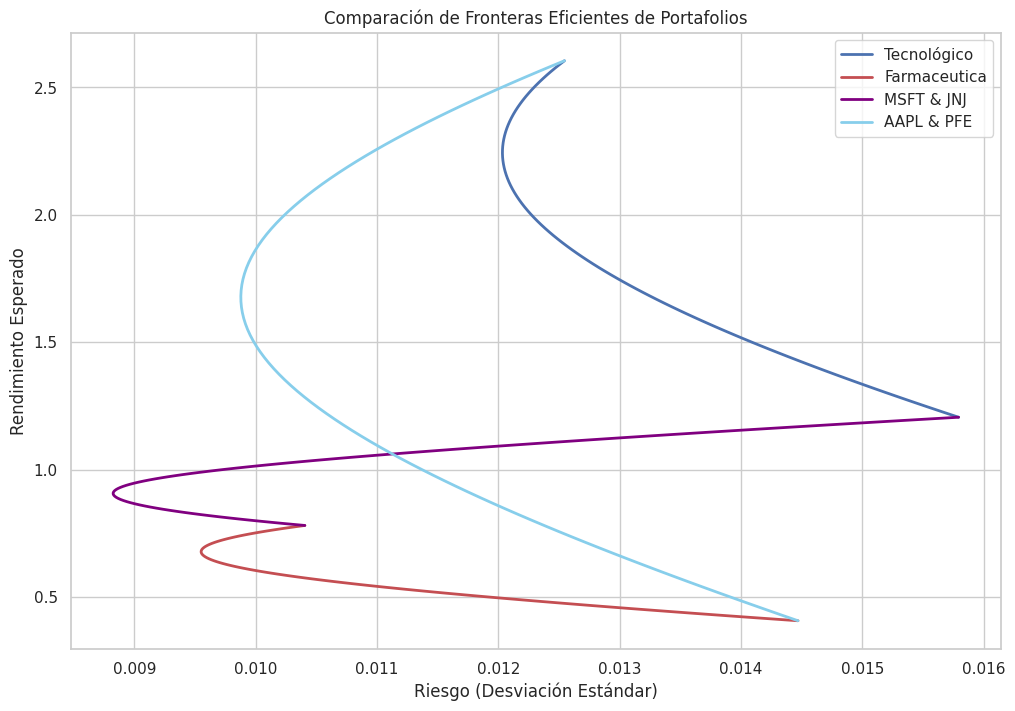

In [64]:
plt.figure(figsize=(12, 8))

# Graficar frontera eficiente para el portafolio tecnológico
plt.plot(riesgos_tech, rendimientos_tech_m*100, 'b', markersize=4, linewidth=2, label='Tecnológico')
plt.plot(riesgos_farm, rendimientos_farm_m*100, 'r', markersize=4, linewidth=2, label='Farmaceutica')
plt.plot(riesgos_div1, rendimientos_div1_m*100, 'purple', markersize=4, linewidth=2, label='MSFT & JNJ')
plt.plot(riesgos_div2, rendimientos_div2_m*100, 'skyblue', markersize=4, linewidth=2, label='AAPL & PFE')

# Etiquetas y título
plt.title('Comparación de Fronteras Eficientes de Portafolios')
plt.xlabel('Riesgo (Desviación Estándar)')
plt.ylabel('Rendimiento Esperado')
plt.legend()
plt.grid(True)

# Mostrar gráfica
plt.show()